simplified self-attentin  mechanism compute weights and  resulting context vector without trainable weights

---



In [1]:
import torch

In [2]:
inputs = torch.tensor(
  [[0.43, 0.15, 0.89], # Your x^1
  [0.55, 0.87, 0.66], # journey x^2
  [0.57, 0.85, 0.64], # starts x^3
  [0.22, 0.58, 0.33], # with x^4
  [0.77, 0.25, 0.10], # one x^5
  [0.05, 0.80, 0.55]] # step   x^6
)


to get attention score between query token and each input token

lets take second query x^2 (journey) as query token we take dot product of query with each of the input token.


In [3]:
query = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
  attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)


tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


we can use normalization of these values to get btwn 0 and 1 can use any normalization

In [4]:
attn_weights_2_tmp = attn_scores_2/attn_scores_2.sum()
print("Attention weights: ", attn_weights_2_tmp)
print("Sum: ", attn_weights_2_tmp.sum())

Attention weights:  tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum:  tensor(1.0000)


In practise it is more common and advisable to use softmax function for normalization.This approach is better at managing extreme values and offers more favourable gradient properties during training

In [5]:
def softmax_naive(x):
  return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attnetion weights: ", attn_weights_2_naive)
print("Sum: ", attn_weights_2_naive.sum())

Attnetion weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


In addition, the softmax function ensures that the attention weights are always posi-
tive. This makes the output interpretable as probabilities or relative importance,
where higher weights indicate greater importance.
Note that this naive softmax implementation (softmax_naive) may encounter
numerical instability problems, such as overflow and underflow, when dealing with
large or small input values. Therefore, in practice, it’s advisable to use the PyTorch
implementation of softmax, which has been extensively optimized for performance

In [6]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attnetion weights: ", attn_weights_2)
print("Sum: ", attn_weights_2.sum())

Attnetion weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


In [7]:
query = inputs[1]
context_vec_2 = torch.zeros(query.shape)
for i, x_i in enumerate(inputs):
  context_vec_2 += attn_weights_2[i] * x_i
print(context_vec_2)

tensor([0.4419, 0.6515, 0.5683])


In [8]:
print(query.shape)

torch.Size([3])


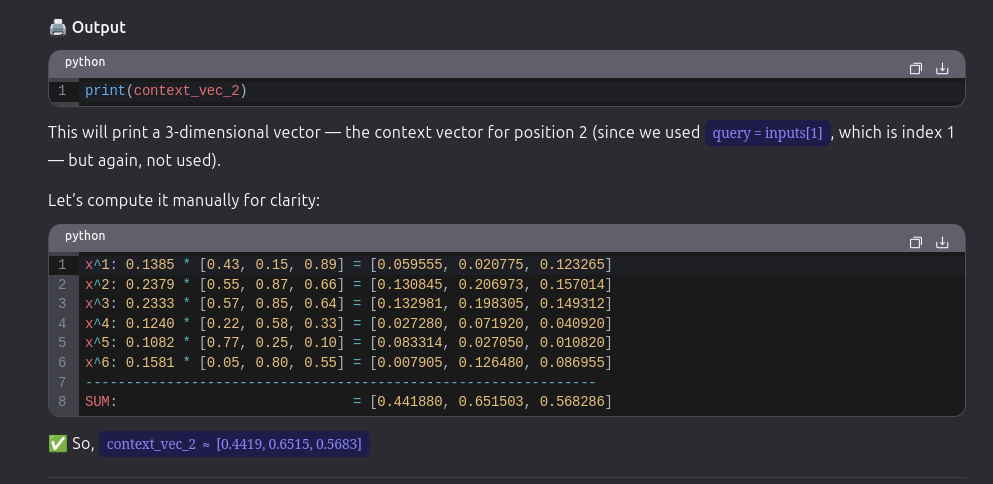

In [9]:
attn_scores = torch.empty(6, 6)
for i, x_i in enumerate(inputs):
  for j, x_j in enumerate(inputs):
    attn_scores[i, j] = torch.dot(x_i , x_j)
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


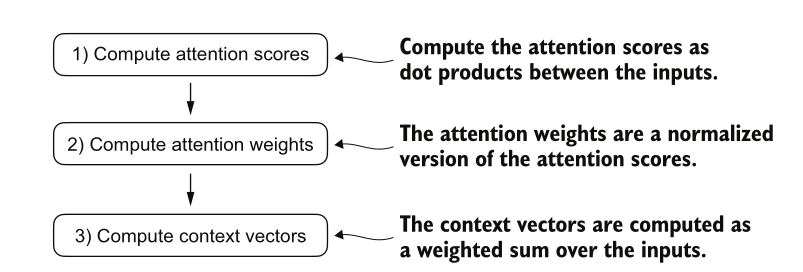

In [10]:
#instead of using for loops which take more time we can use matrix multiplication
print(inputs)
print(inputs.T)

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])
tensor([[0.4300, 0.5500, 0.5700, 0.2200, 0.7700, 0.0500],
        [0.1500, 0.8700, 0.8500, 0.5800, 0.2500, 0.8000],
        [0.8900, 0.6600, 0.6400, 0.3300, 0.1000, 0.5500]])


In [11]:
attn_scores = inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [12]:
attn_weights = torch.softmax(attn_scores, dim = -1)
print(attn_weights)
print("Sum: ",attn_weights.sum(dim=-1))

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])
Sum:  tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])


n the context of using PyTorch, the dim parameter in functions like torch.softmax
specifies the dimension of the input tensor along which the function will be com-
puted. By setting dim=-1, we are instructing the softmax function to apply the nor-
malization along the last dimension of the attn_scores tensor. If attn_scores is a
two-dimensional tensor (for example, with a shape of [rows, columns]), it will nor-
malize across the columns so that the values in each row (summing over the column
dimension) sum up to 1.
We can verify that the rows indeed all sum to 1:

In [13]:
all_context_vecs = attn_weights @ inputs
print(all_context_vecs)
_

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


''

This concludes the code walkthrough of a simple self-attention mechanism. Next, we
will add trainable weights, enabling the LLM to learn from data and improve its per-
formance on specific tasks.

**<h1>Implementing self-attention with trainable weights</h1>**
Our next step will be to implement the self-attention mechanism used in the original transformer architecture, the GPT models, and most other popular LLMs. This
self-attention mechanism is also called **scaled dot-product attention**
. Figure 3.13 shows
how this self-attention mechanism fits into the broader context of implementing
an LLM.

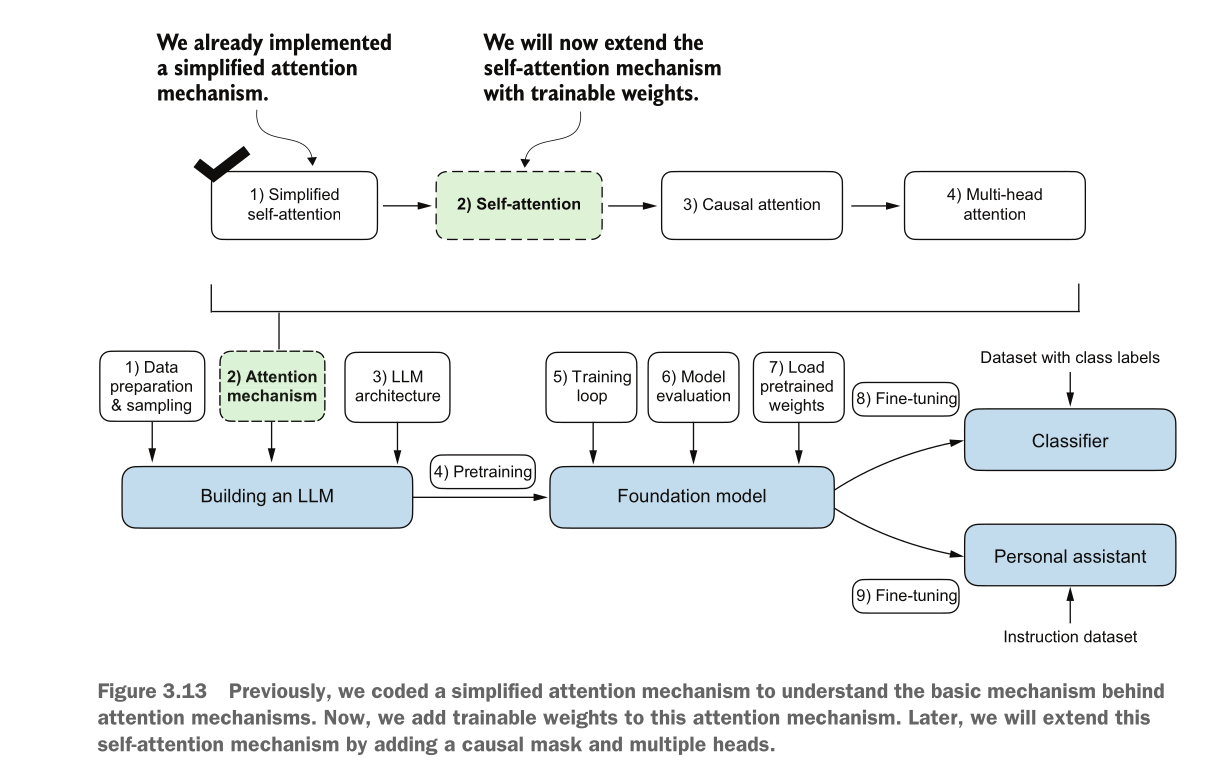

**<h1>COmputing the attention weights step by stepp</h1>**
We will implement the self-attention mechanism step by step by introducing the
three trainable weight matrices Wq, Wk, and Wv. These three matrices are used to
project the embedded input tokens, x(i), into query, key, and value vectors, respec-
tively, as illustrated in figure 3.14.

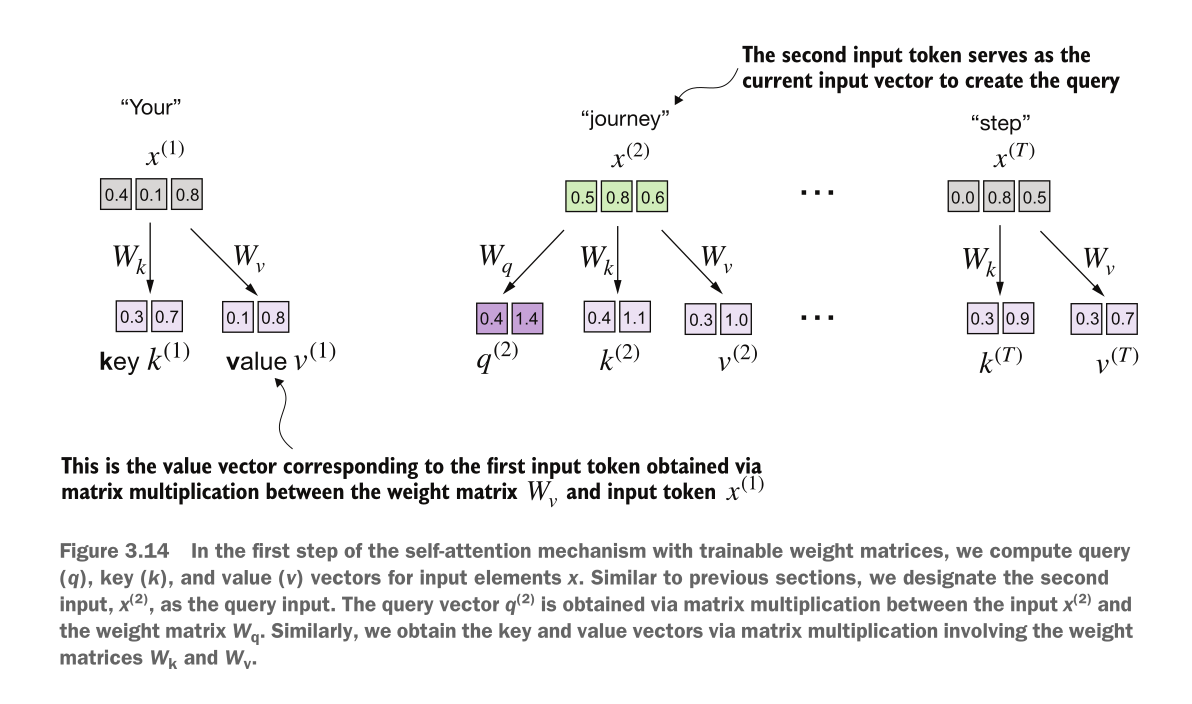

Earlier, we defined the second input element x(2) as the query when we computed the
simplified attention weights to compute the context vector z(2). Then we generalized
this to compute all context vectors z(1) ... z(T) for the six-word input sentence “Your
journey starts with one step.”
Similarly, we start here by computing only one context vector, z(2), for illustration
purposes. We will then modify this code to calculate all context vectors.
Let’s begin by defining a few variables:


In [14]:
x_2 = inputs[1] #second input element
d_in = inputs.shape[1] #input embedding size, d=3
d_out = 2 #output embedding size, d=2


Note that in GPT-like models, the input and output dimensions are usually the same,
but to better follow the computation, we’ll use different input ( d_in=3) and output
(d_out=2) dimensions here.
Next, we initialize the three weight matrices Wq, Wk, and Wv shown in figure 3.14:

In [15]:
torch.manual_seed(123)
w_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad = False)
w_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
w_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

We set requires_grad=False to reduce clutter in the outputs, but if we were to use
the weight matrices for model training, we would set requires_grad=True to update
these matrices during model training.

In [16]:
query_2 = x_2 @ w_query
key_2 = x_2 @ w_key
value_2 = x_2 @ w_value
print(x_2)
print(w_query)
print(query_2)

tensor([0.5500, 0.8700, 0.6600])
Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
tensor([0.4306, 1.4551])


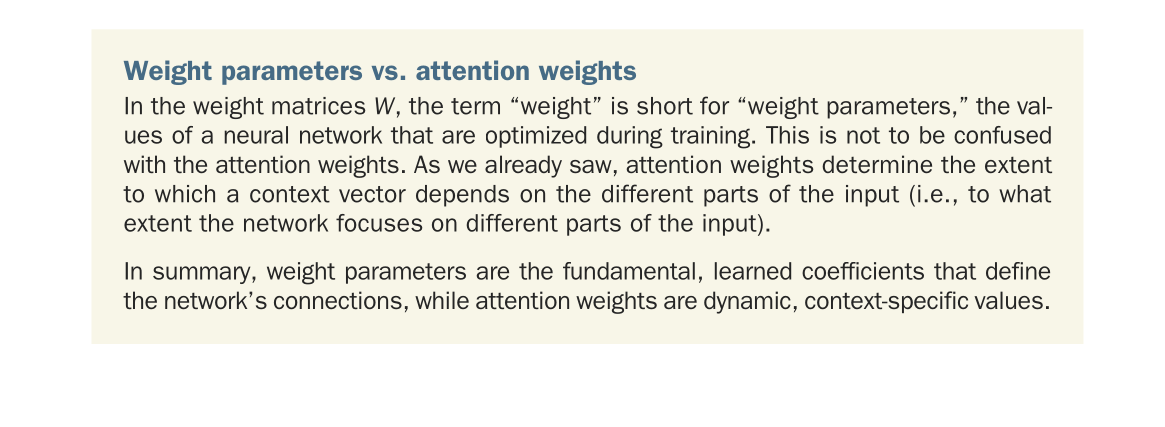

In [17]:
keys = inputs @ w_key
values = inputs @ w_value
print(keys)
print(values)
print("Keys shape: ", keys.shape)
print("values shape: ", values.shape)

tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])
tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]])
Keys shape:  torch.Size([6, 2])
values shape:  torch.Size([6, 2])


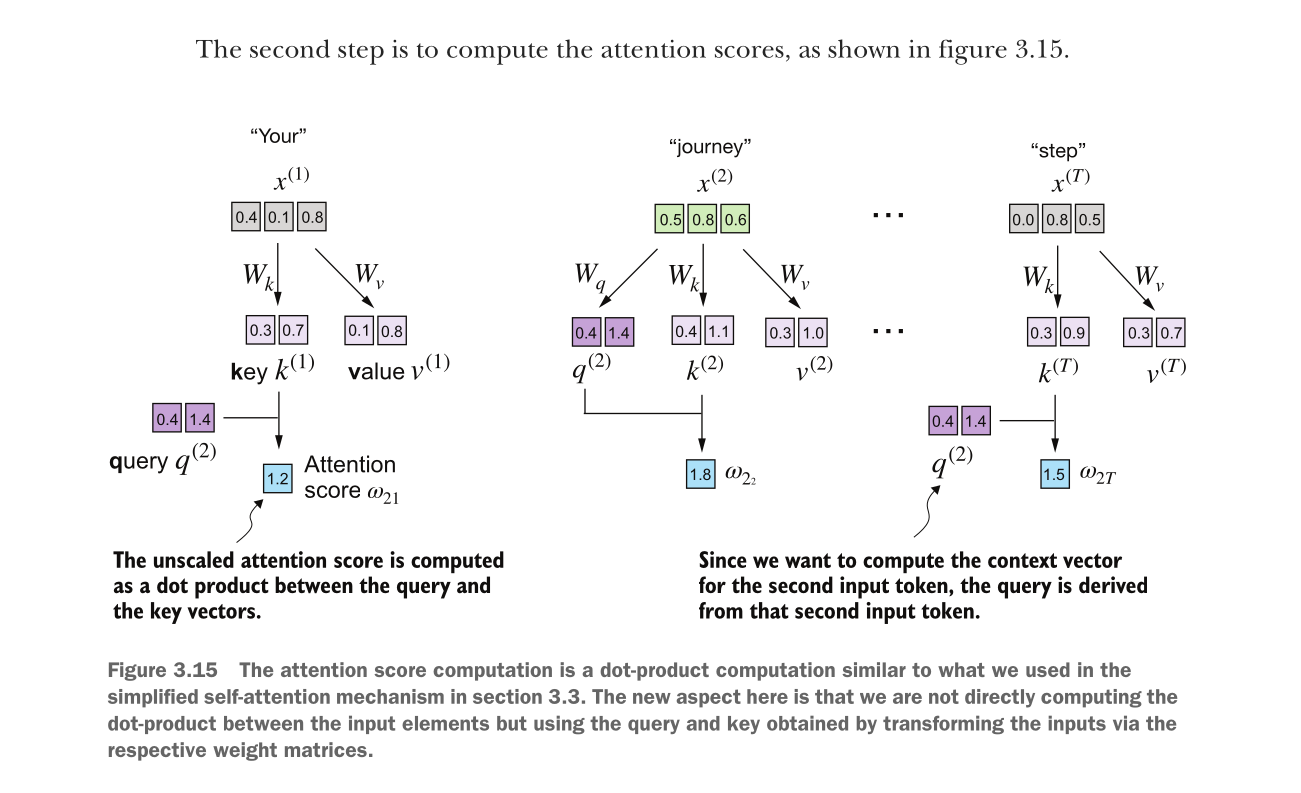

In [18]:
#computing the attention score of single query
keys_2 = keys[1] #takes x_2 = journey
attn_scores_22 = query_2.dot(keys_2)
print(attn_scores_22)

tensor(1.8524)


In [19]:
#Again, we can generalize this computation to all attention scores via matrix multiplication
attn_scores_2 = query_2 @ keys.T
print("query_2: ", query_2)
print("Keys_t: ",keys.T)
print(attn_scores_2)

query_2:  tensor([0.4306, 1.4551])
Keys_t:  tensor([[0.3669, 0.4433, 0.4361, 0.2408, 0.1827, 0.3275],
        [0.7646, 1.1419, 1.1156, 0.6706, 0.3292, 0.9642]])
tensor([1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440])


In [20]:
#finding attention weight
d_k = keys.shape[-1]
print("d_k", d_k)
attn_weights_2 = torch.softmax(attn_scores_2 / d_k**0.5 , dim=-1)
print(attn_weights_2)

d_k 2
tensor([0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820])


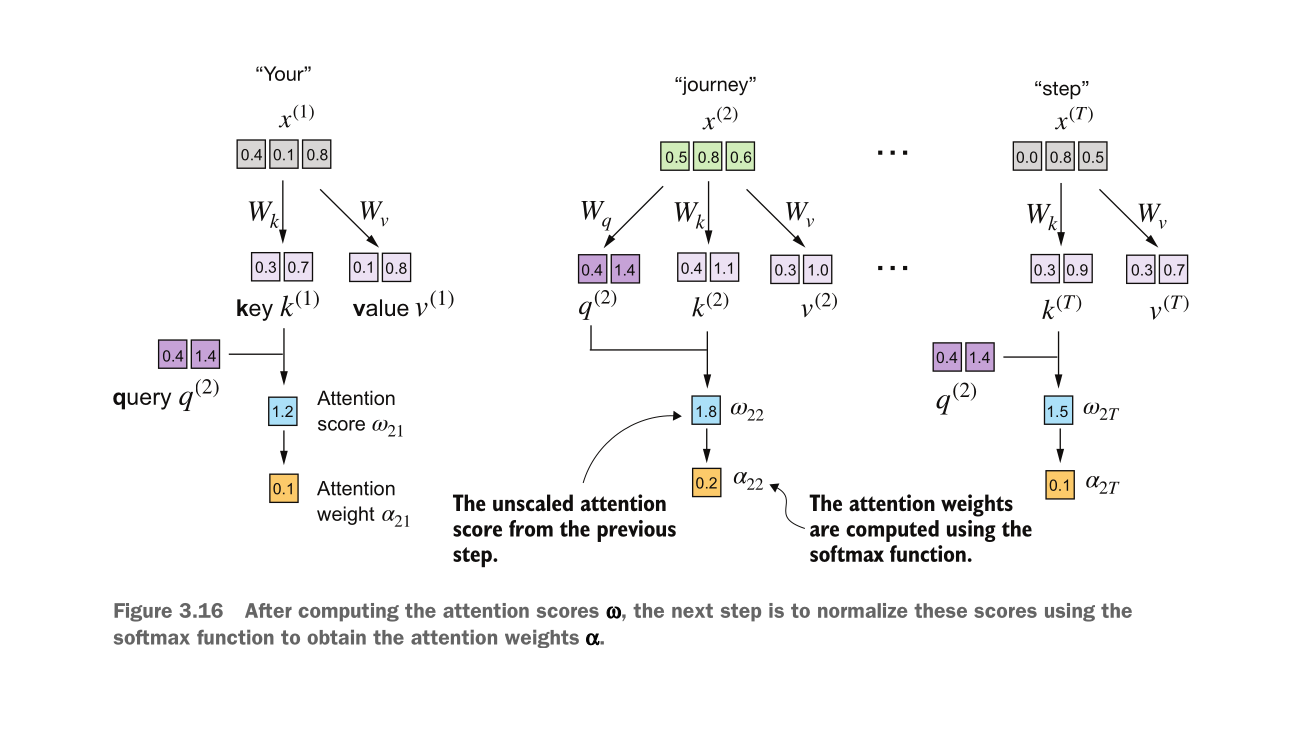

**The rationale behind scaled dot-product attention**

The reason for the normalization by the embedding dimension size is to improve the training performance by avvoiding small gradients. For instance, when scaling up the embedding dimension, which is typically greater than 1000 for GPT-like LLMs, large dot products can result in very small gradients during backpropagation due to softmax applied to them. As dot product increase, the softmax function behaves more like a step funciton, resulting in gradients nearing zero. These small gradients can drastically slow down learning or cause training to stagnate.

The scaling by the square root of the embedding dimension is the reason why this self attention mechanism is also called scaled dot product attenstion

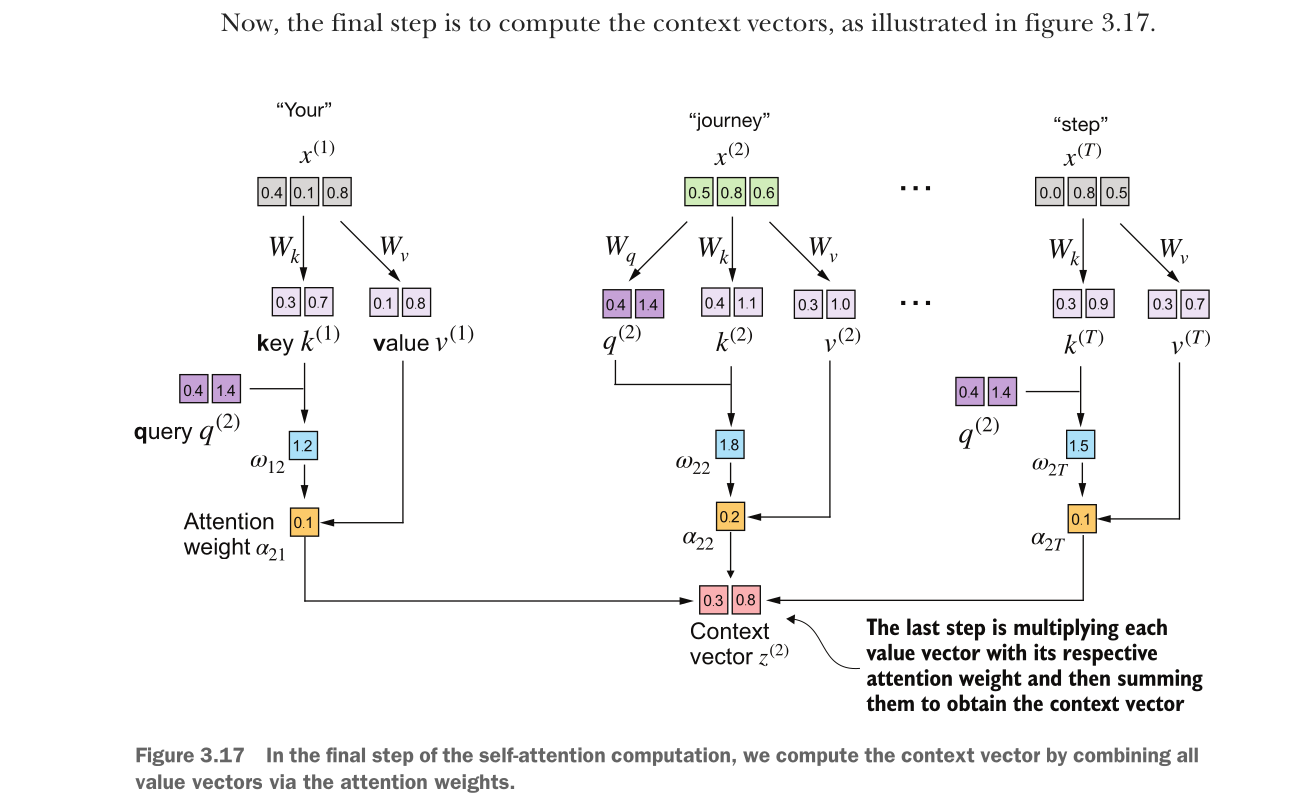

In [21]:
context_vec_2 = attn_weights_2 @ values
print(context_vec_2)

tensor([0.3061, 0.8210])


**<H1>Implementing a compact self-attention python class</H1>**

At this point, we have gone through a lot of steps to compute the self-attention out-
puts. We did so mainly for illustration purposes so we could go through one step at a
time. In practice, with the LLM implementation in the next chapter in mind, it is
helpful to organize this code into a Python class, as shown in the following listing.



In [22]:
#self attention class
import torch.nn as nn
class SelfAttention_v1(nn.Module):
  def __init__(self, d_in, d_out):
    super().__init__()
    self.w_query = nn.Parameter(torch.rand(d_in, d_out))
    self.w_key = nn.Parameter(torch.rand(d_in, d_out))
    self.w_value = nn.Parameter(torch.rand(d_in, d_out))

  def forward(self, x):
    keys  = x @ self.w_key
    queries = x @ self.w_query
    value = x @ self.w_value
    attn_scores = queries @ keys.T #omega
    attn_weights = torch.softmax( attn_scores/ keys.shape[-1] ** 0.5, dim = -1)
    context_vec = attn_weights @ values
    return context_vec

In [23]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))


tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


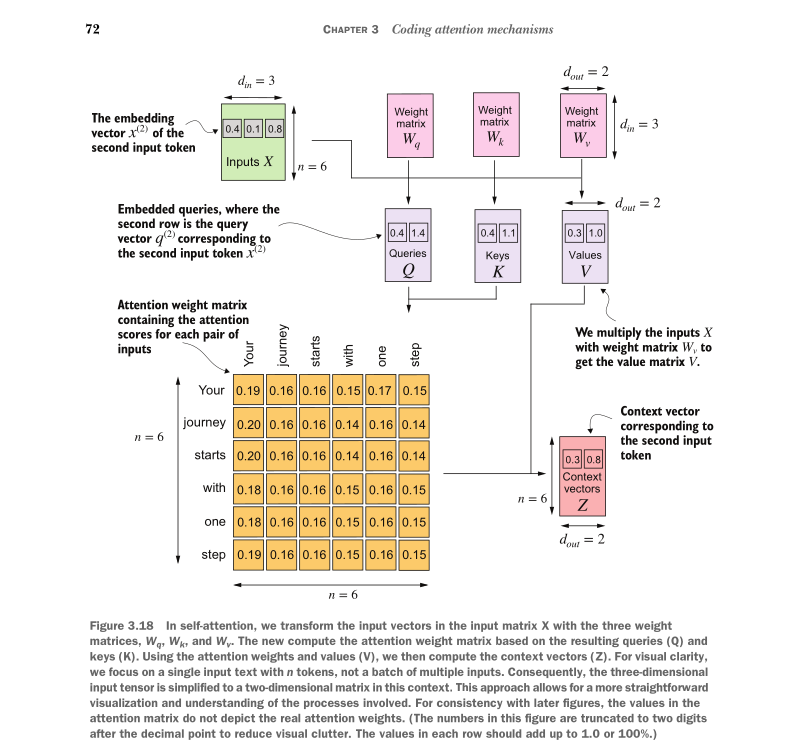

In [24]:
#self attention class
import torch.nn as nn
class SelfAttention_v2(nn.Module):
  def __init__(self, d_in, d_out, qkv_bias=False):
    super().__init__()
    self.w_query = nn.Linear(d_in, d_out, qkv_bias)
    self.w_key = nn.Linear(d_in, d_out, qkv_bias)
    self.w_value = nn.Linear(d_in, d_out, qkv_bias)

  def forward(self, x):
    keys  = self.w_key(x)
    queries = self.w_query(x)
    value = self.w_value(x)
    attn_scores = queries @ keys.T #omega
    attn_weights = torch.softmax( attn_scores/ keys.shape[-1] ** 0.5, dim = -1)
    context_vec = attn_weights @ values
    return context_vec

In [25]:
torch.manual_seed(789)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[0.2762, 0.7584],
        [0.2761, 0.7638],
        [0.2762, 0.7637],
        [0.2780, 0.7609],
        [0.2785, 0.7603],
        [0.2772, 0.7618]], grad_fn=<MmBackward0>)


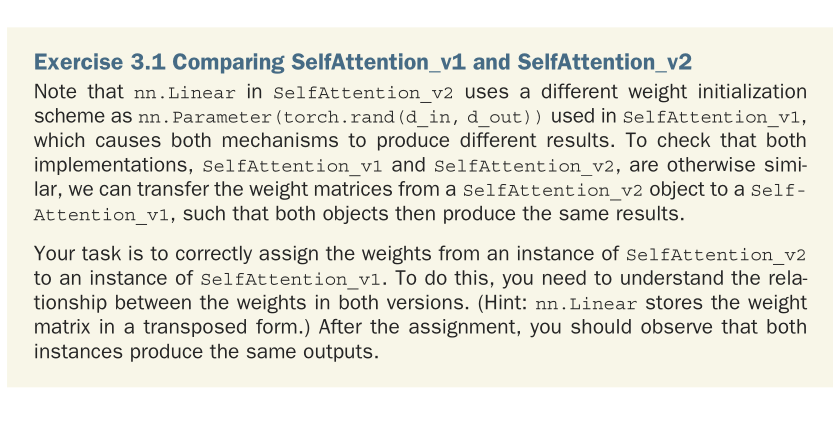

**<H1>Hiding future words with causal atttention</h1>**
for many LLM tasks, you will want the self-attention mechanism to consider only the appear prior to the current  position when predicting the next token in a sequnce. Casual attention, also knows as masked attention, is a specialized form of self attention.It restricts a model to only consider previous and current inputs in a sequence when processing any given token when computing attention scores.This is in contrast to the standard self attention mechanism, which allows access to the entire input sequence at once.
<br>
<hl>
<br>
Now, we will modify the standard  self-attenuation mechanism to create a casual attention mechansim, which is essential for developing an LLM in the subsequent chapters.To achieve this in GPT-like LLMs,for each token processed, we mask out the future tokens, which come after the current tokens,which come after the current token in the input text, as shown in fig 3.19. we mask out the attention weights above the diagonal and we noramlize the nonmasked attention weights such that the attention weights sum to 1 in each row.Later we will implement this maskig and normalize procedure in code

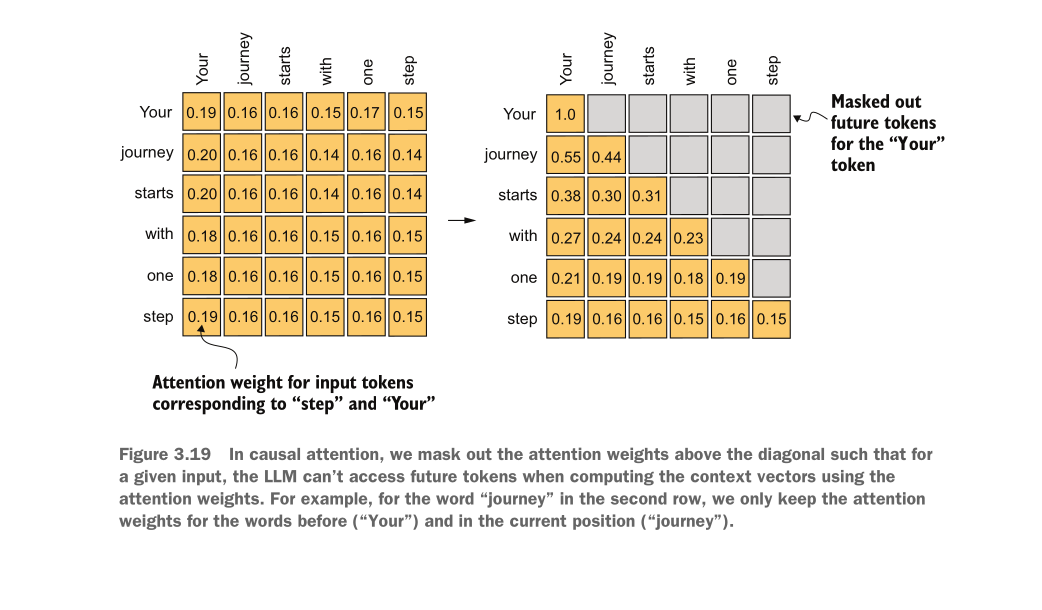

**<h1>Applying a casual attention mask</h1>**

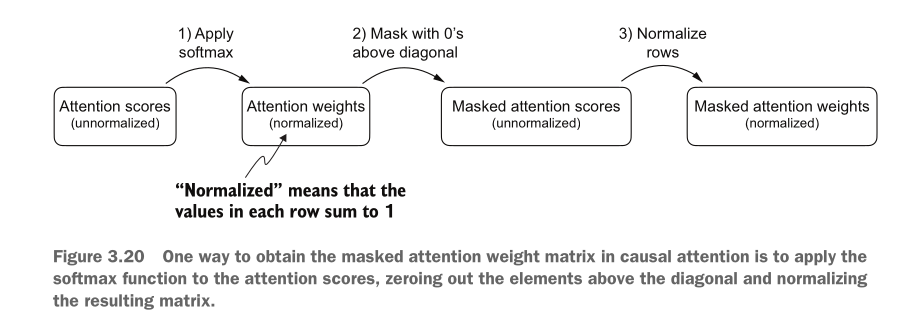

In [26]:
queries = sa_v2.w_query(inputs)
keys = sa_v2.w_key(inputs)
attn_scores = queries @ keys.T
attn_weights = torch.softmax(attn_scores / keys.shape[-1] ** 0.5, dim=-1)
print(attn_weights)

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


We can implement the second step using PyTorch’s tril function to create a mask
where the values above the diagonal are zero:

In [27]:
context_length = attn_scores.shape[0]
mask_simple = torch.tril(torch.ones(context_length, context_length))
print(mask_simple)

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])


In [28]:
masked_simple = attn_weights * mask_simple
print(masked_simple)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


since we masked normalized values we have to renormalized so attention weights sum to 1

In [29]:
row_sums = masked_simple.sum(dim=-1,keepdim = True)
print(row_sums)
masked_simple_norm = masked_simple/row_sums
print(masked_simple_norm)


tensor([[0.1921],
        [0.3700],
        [0.5357],
        [0.6775],
        [0.8415],
        [1.0000]], grad_fn=<SumBackward1>)
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


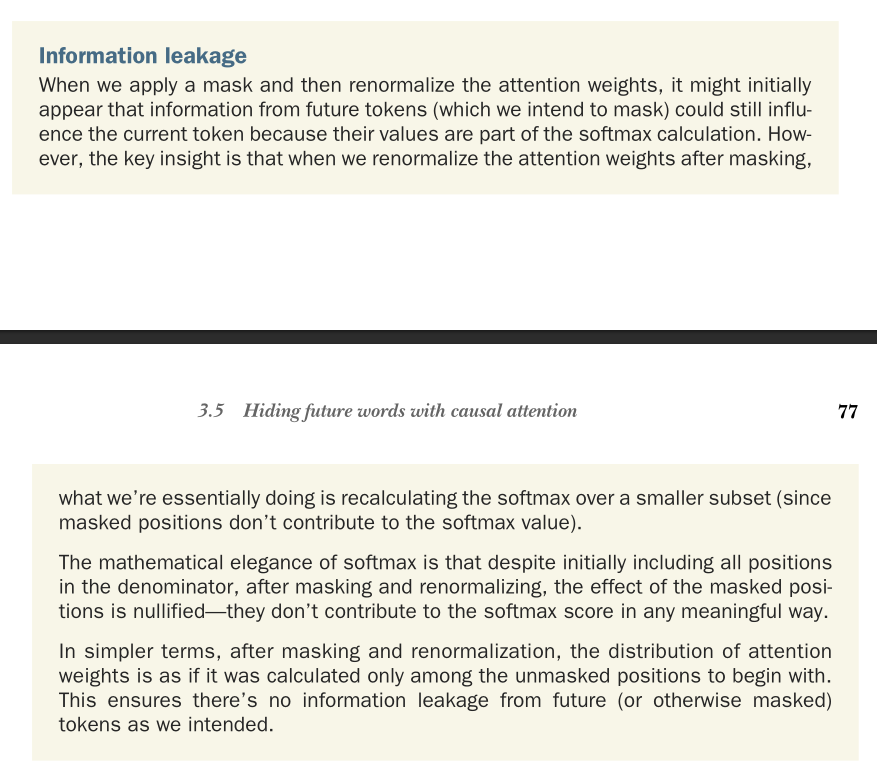

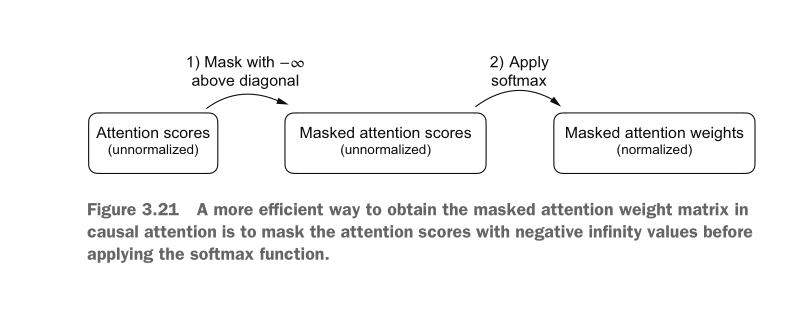

In [30]:
mask = torch.triu(torch.ones(context_length, context_length), diagonal=1)
print(attn_scores)
masked = attn_scores.masked_fill(mask.bool(), -torch.inf)
print(masked)

tensor([[ 0.2899,  0.0716,  0.0760, -0.0138,  0.1344, -0.0511],
        [ 0.4656,  0.1723,  0.1751,  0.0259,  0.1771,  0.0085],
        [ 0.4594,  0.1703,  0.1731,  0.0259,  0.1745,  0.0090],
        [ 0.2642,  0.1024,  0.1036,  0.0186,  0.0973,  0.0122],
        [ 0.2183,  0.0874,  0.0882,  0.0177,  0.0786,  0.0144],
        [ 0.3408,  0.1270,  0.1290,  0.0198,  0.1290,  0.0078]],
       grad_fn=<MmBackward0>)
tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [31]:
attn_weights = torch.softmax(masked / keys.shape[-1]**0.5, dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


**<h1>Masking attention weights with dropout<h1>**

Note: Dropout is used only during training and is disabled afterward
<br>
In the transformer architecture, including models like GPT, dropout in the atten-
tion mechanism is typically applied at two specific times: after calculating the atten-
tion weights or after applying the attention weights to the value vectors. Here we will
apply the dropout mask after computing the attention weights

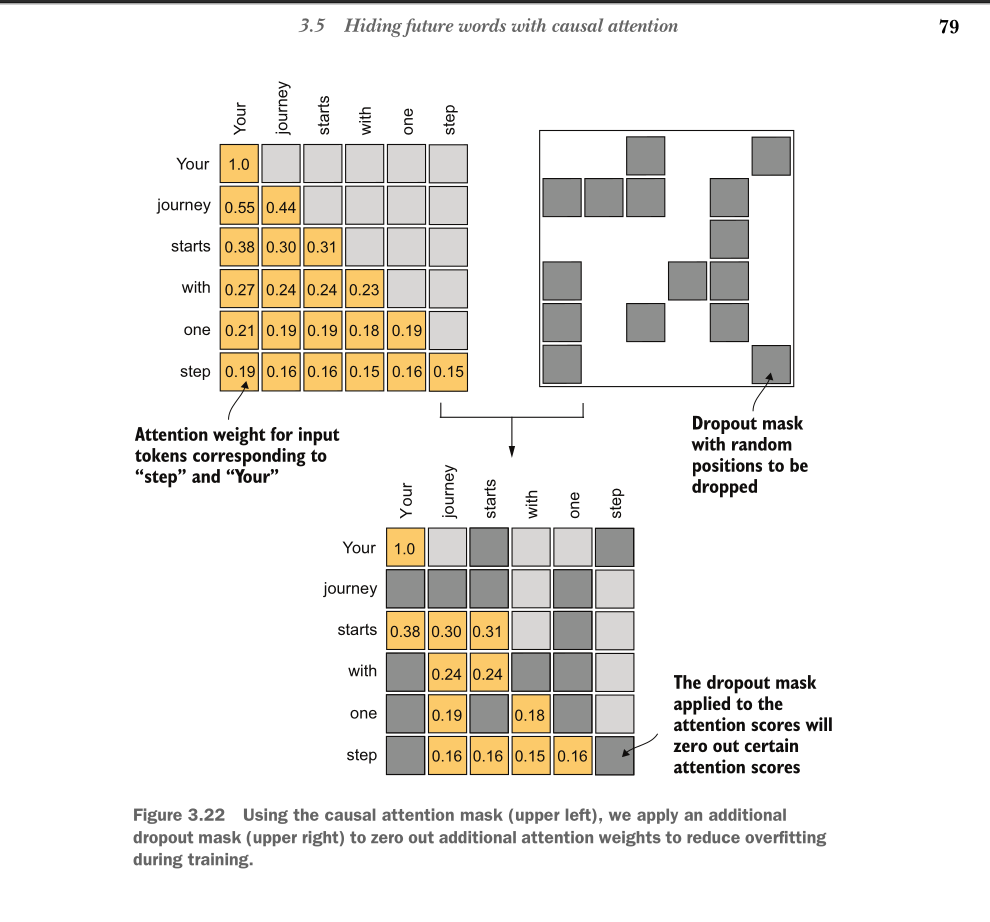

In [32]:
torch.manual_seed(123)
dropout = torch.nn.Dropout(0.5)
example = torch.ones(6,6)
print(dropout(example))

tensor([[2., 2., 0., 2., 2., 0.],
        [0., 0., 0., 2., 0., 2.],
        [2., 2., 2., 2., 0., 2.],
        [0., 2., 2., 0., 0., 2.],
        [0., 2., 0., 2., 0., 2.],
        [0., 2., 2., 2., 2., 0.]])


When applying dropout to an attention weight matrix with a rate of 50%, half of the
elements in the matrix are randomly set to zero. To compensate for the reduction in
active elements, the values of the remaining elements in the matrix are scaled up by a
factor of 1/0.5 = 2. This scaling is crucial to maintain the overall balance of the attention weights, ensuring that the average influence of the attention mechanism remains
consistent during both the training and inference phases.


In [33]:
torch.manual_seed(123)
print(dropout(attn_weights))

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.7599, 0.6194, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.4921, 0.4925, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3966, 0.0000, 0.3775, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.3331, 0.3084, 0.3331, 0.0000]],
       grad_fn=<MulBackward0>)


**<h1>Implementing a compact casual attention class<h1>**


In [34]:
# we emulate the batched coming from previous code

batch = torch.stack((inputs, inputs), dim=0)
print(batch.shape)

torch.Size([2, 6, 3])


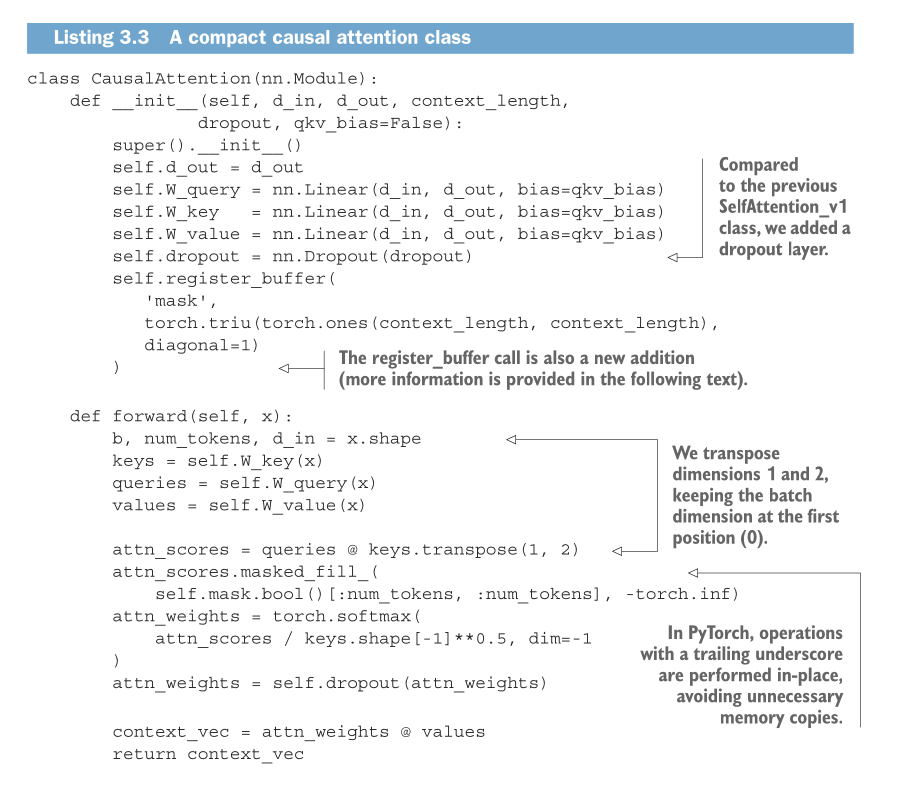

In [35]:
class CausalAttention(nn.Module):
  def __init__(self, d_in, d_out, context_length, dropout, qkv_bias=False):
    super().__init__()
    self.d_out = d_out
    self.w_query = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.w_key = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.w_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.dropout = nn.Dropout(dropout)
    self.register_buffer(
        'mask',
        torch.triu(torch.ones(context_length, context_length), diagonal = 1)
    )

  def forward(self, x):
    b, num_tokens, d_in = x.shape
    keys= self.w_key(x)
    queries =self.w_query(x)
    values = self.w_value(x)
    attn_scores = queries @ keys.transpose(1, 2)
    attn_scores.masked_fill_(self.mask.bool()[:num_tokens, :num_tokens], -torch.inf)
    attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
    ttn_weights = self.dropout(attn_weights)
    context_vec = attn_weights @ values
    return context_vec

In [36]:
torch.manual_seed(123)
context_length = batch.shape[1]
ca = CausalAttention(d_in, d_out, context_length, 0.0)
context_vecs = ca(batch)
print("context_vecs.shape:", context_vecs.shape)

context_vecs.shape: torch.Size([2, 6, 2])


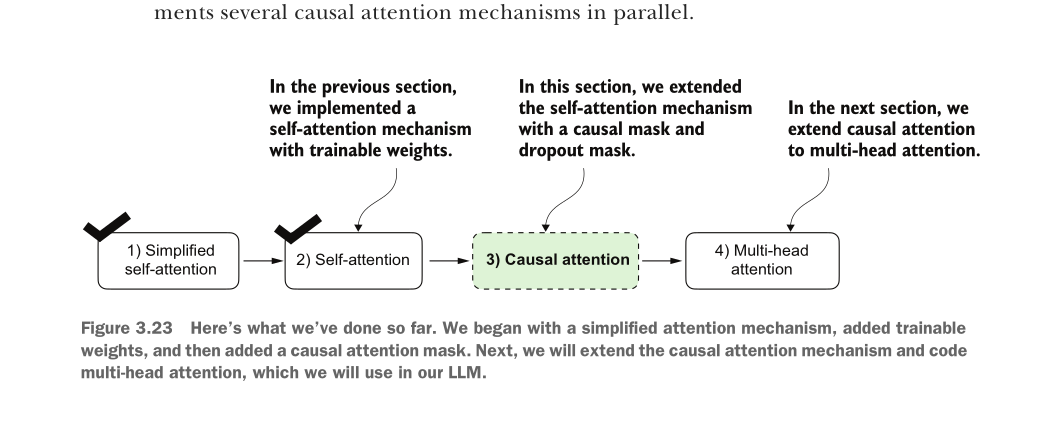

**<h1>Extending single head attention to multi-head attention</h1>**
In practical terms, implementing multi-head attention involves creating multiple
instances of the self-attention mechanism (see figure 3.18), each with its own weights,
and then combining their outputs. Using multiple instances of the self-attention
mechanism can be computationally intensive, but it’s crucial for the kind of complex
pattern recognition that models like transformer-based LLMs are known for.

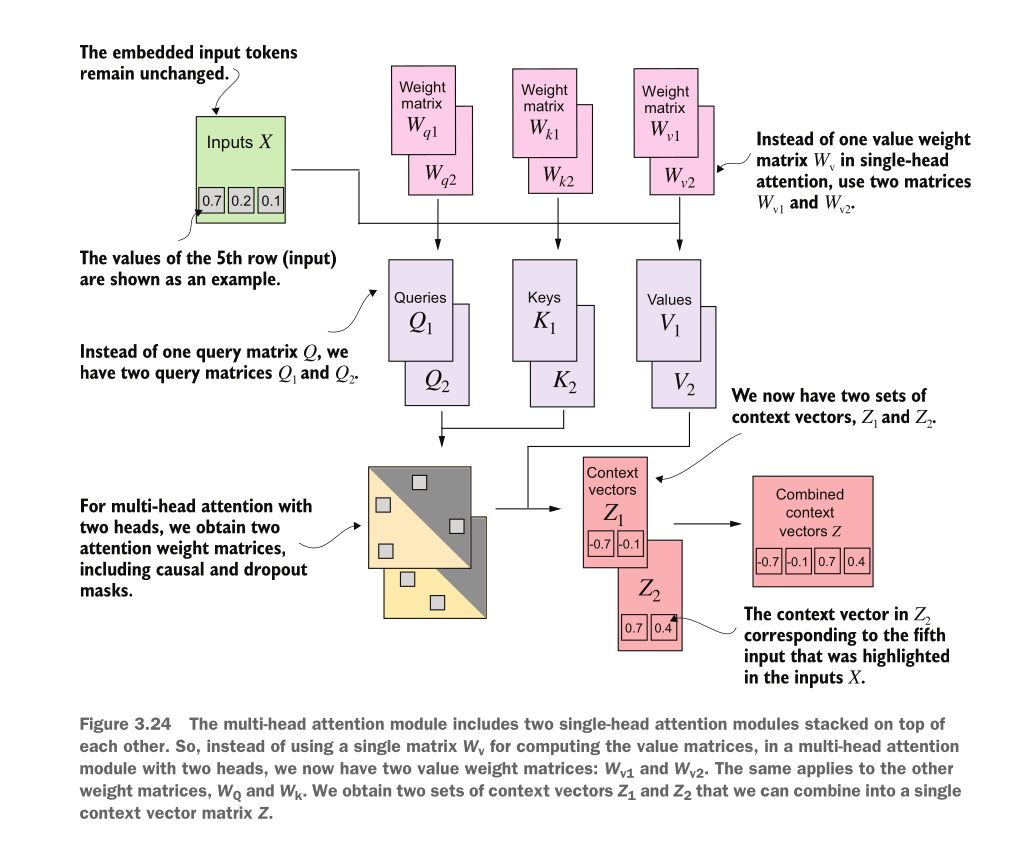


In [39]:
#A wrapper class toimplement multi-head attention
class MultiHeadAttentionWrapper(nn.Module):
  def __init__(self,  d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
    super().__init__()
    self.heads = nn.ModuleList(
        [CausalAttention(d_in, d_out, context_length, dropout, qkv_bias)
        for _ in range(num_heads)]
    )

  def forward(self, x):
    return torch.cat([head(x) for head in self.heads], dim=-1)



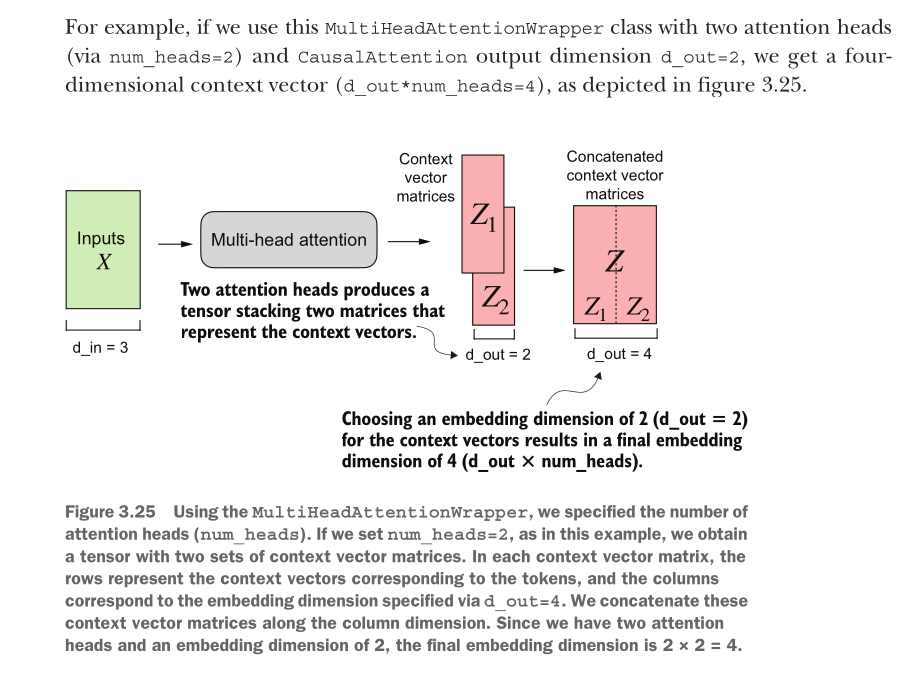

In [40]:
torch.manual_seed(123)
context_length = batch.shape[1] #number of tokens
d_in,d_out = 3,2

mha = MultiHeadAttentionWrapper(d_in, d_out, context_length, 0.0, num_heads=2)
context_vecs = mha(batch)

print(context_vecs)

print("context vecs shape: ", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context vecs shape:  torch.Size([2, 6, 4])


In [41]:
torch.manual_seed(123)
context_length = batch.shape[1] # This is the number of tokens
d_in, d_out = 3, 2
mha = MultiHeadAttentionWrapper(
  d_in, d_out, context_length, 0.0, num_heads=2
)
context_vecs = mha(batch)
print(context_vecs)
print("context_vecs.shape:", context_vecs.shape)

tensor([[[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]],

        [[-0.4519,  0.2216,  0.4772,  0.1063],
         [-0.5874,  0.0058,  0.5891,  0.3257],
         [-0.6300, -0.0632,  0.6202,  0.3860],
         [-0.5675, -0.0843,  0.5478,  0.3589],
         [-0.5526, -0.0981,  0.5321,  0.3428],
         [-0.5299, -0.1081,  0.5077,  0.3493]]], grad_fn=<CatBackward0>)
context_vecs.shape: torch.Size([2, 6, 4])


**<h1>Implementing multi-head attention with weight splits</h1>**

An efficient multi-head attention class


In [42]:
class MultiHeadAttention(nn.Module):
  def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
    super().__init__()
    assert( d_out % num_heads == 0), \
        "d_out must be divisible by num_heads"
    self.d_out = d_out
    self.num_heads = num_heads
    self.head_dim = d_out //num_heads
    self.w_query = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.w_key = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.w_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.out_proj = nn.Linear(d_in, d_out)
    self.dropout= nn.Dropout(dropout)
    self.register_buffer(
       "mask",
       torch.triu(torch.ones(context_length, context_length), diagonal = 1)
    )

  def forward(self, x):
    b, num_tokens, d_in = x.shape
    keys = self.w_key(x)
    queries = self.w_query(x)
    values = self.w_value(x)

    keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
    values = values.view(b, num_tokens, self.num_heads, self.head_dim)
    queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)
    keys = keys.transpose(1, 2)
    queries = queries.transpose(1, 2)
    values = values.transpose(1, 2)

    attn_scores = queries @ keys.transpose(2, 3)
    mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

    attn_scores.masked_fill_(mask_bool, -torch.inf)

    attn_weights = torch.softmax(attn_scores/keys.shape[-1] ** 0.5, dim=-1)
    attn_weights = self.dropout(attn_weights)

    context_vec = (attn_weights @ values).transpose(1,2)
    context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)

    context_vec =  self.out_proj(context_vec)
    return context_vec


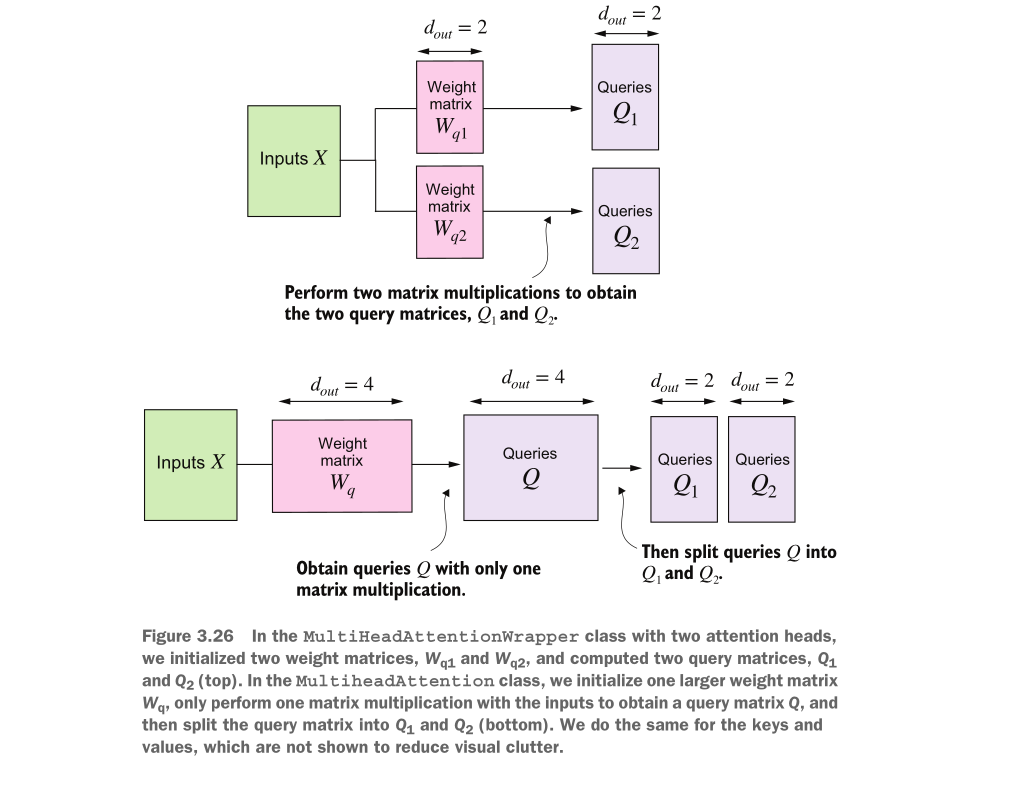